In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
x_train = training_set.iloc[:, 1:].values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [4]:
x_test = test_set.iloc[:, :].values
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [6]:
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [7]:
x_train.shape

(42000, 784)

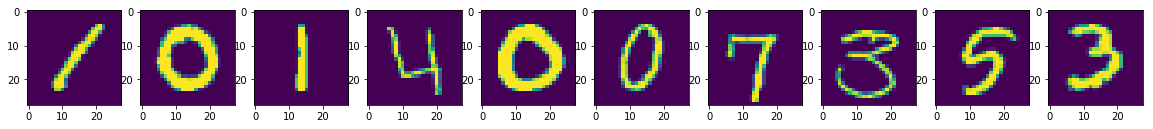

In [8]:
n = 10

plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))

In [9]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(x_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -119.89, time = 3.55s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -105.24, time = 4.99s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -97.37, time = 4.75s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -93.22, time = 4.75s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -90.06, time = 4.60s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -87.99, time = 4.59s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -86.45, time = 4.69s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -84.54, time = 4.82s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -82.90, time = 4.83s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -81.18, time = 4.79s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
       random_state=0, verbose=True)

In [10]:
xx = x_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

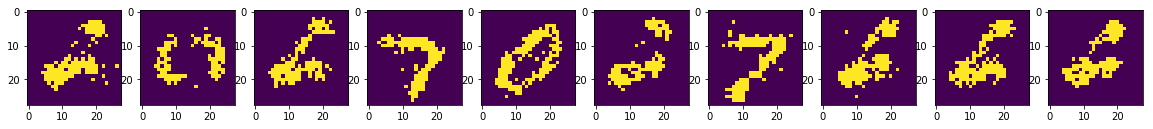

In [11]:
n = 10

plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(xx[i].reshape(28, 28))

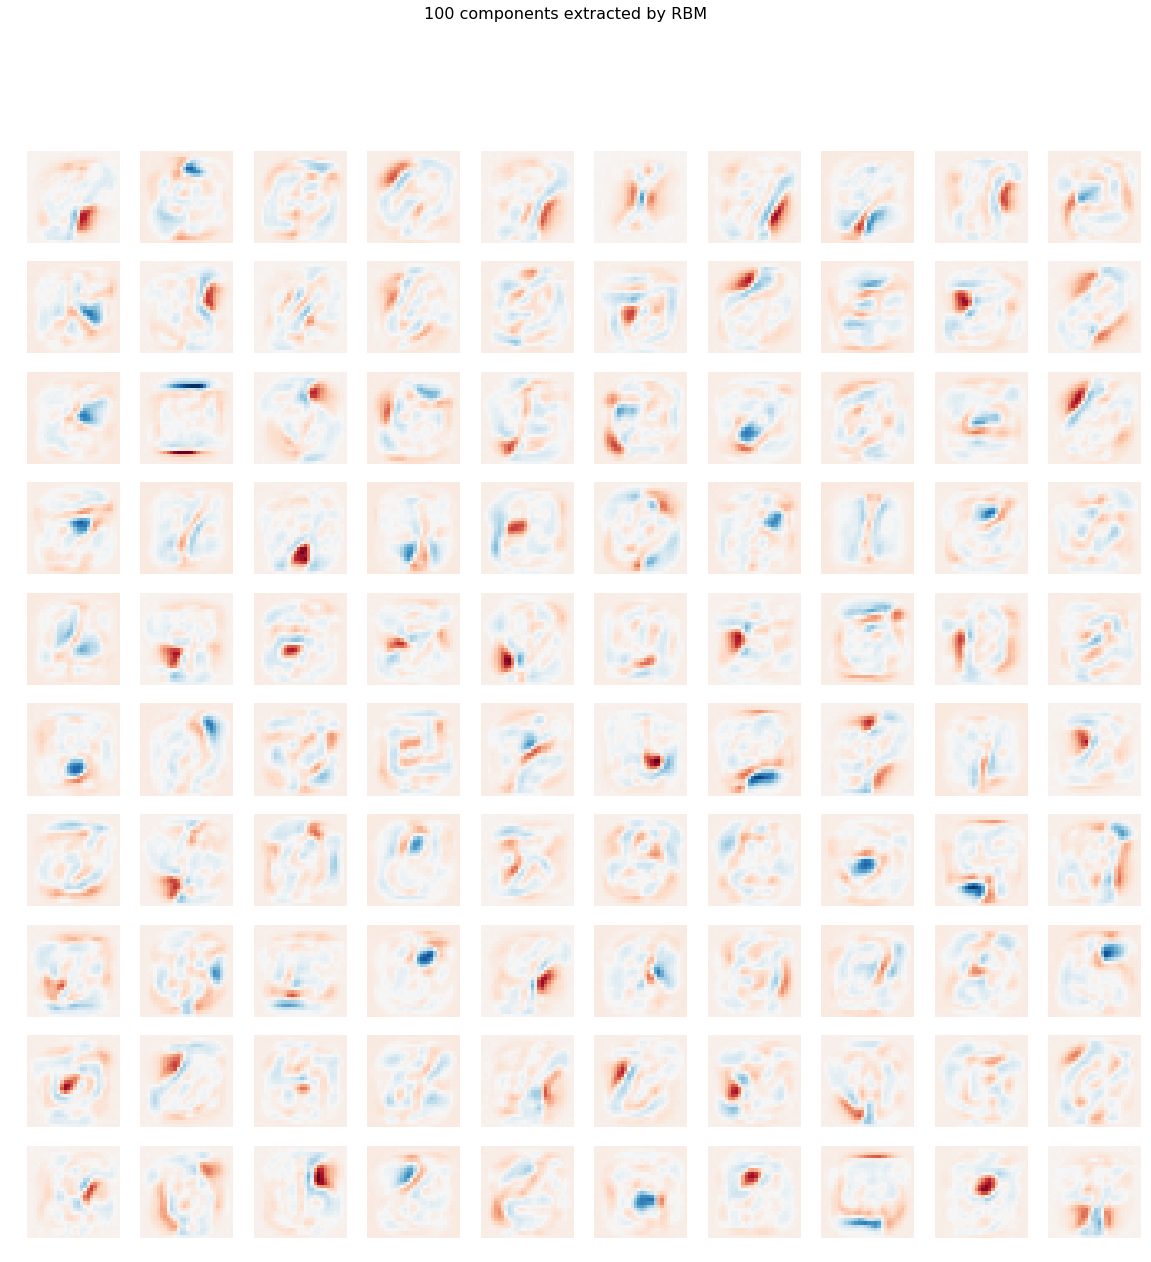

In [12]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);